In [6]:
import importlib
import ntuputils
import logging

In [3]:
importlib.reload(ntuputils)

   INFO:2020-08-17 13:19:08:ntuputils:16 Logger hgcalplot is already defined
   INFO:2020-08-17 13:19:08:ntuputils:39 Using tqdm notebook


<module 'ntuputils' from '/uscms_data/d3/klijnsma/hgcal/history/flatntup-interpretation/ntuputils.py'>

   INFO:2020-08-17 13:22:31:ntuputils:160 Overwriting cache for <ntuputils.Dataset (1 root files) object at 0x7f54de7e5f98>


   INFO:2020-08-17 13:22:31:ntuputils:172 Cached ~3.7 Mb (1 entries, 46 branches)
   INFO:2020-08-17 13:22:31:ntuputils:127 Using cache


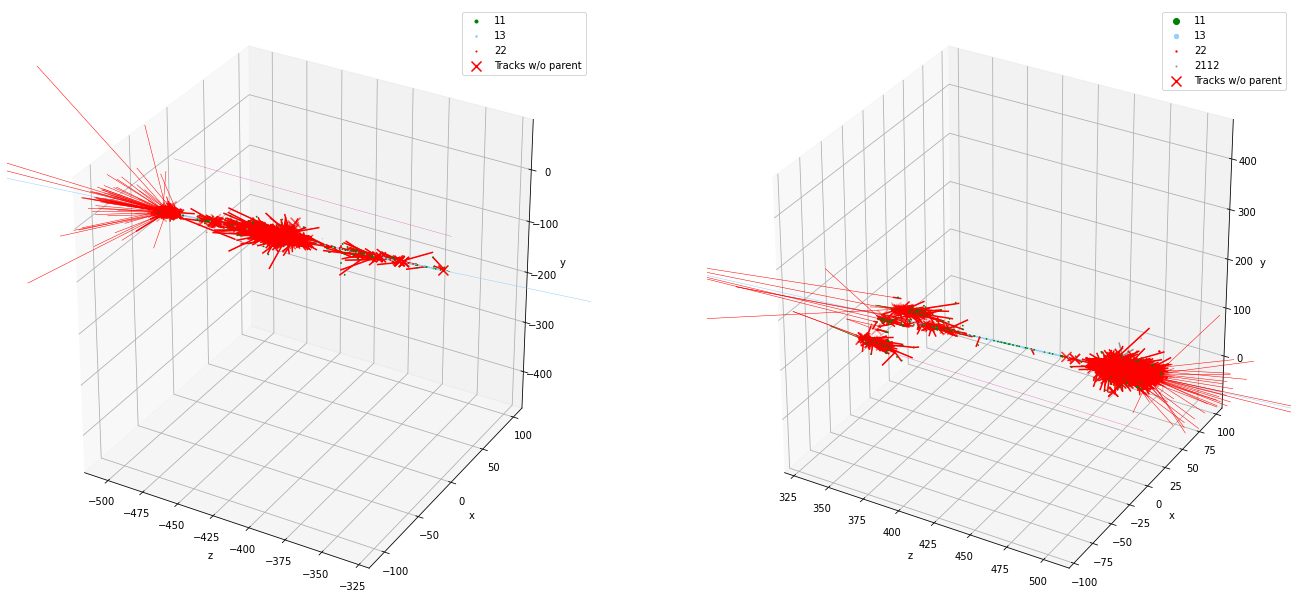

In [7]:
with ntuputils.temporarily_set_loglevel(logging.INFO):
    data_1300000 = ntuputils.Dataset(
        '/uscms/home/klijnsma/nobackup/hgcal/history/cmssw_appending_calohit/CMSSW_11_1_0_pre6/src/HGCALDev/PCaloHitWithPostionProducer/event1300000_numEvent1.root'
        )
    event = data_1300000.get_event(0)
    ntuputils.filter_tracks_to_origin(event, inplace=True)
    fig = ntuputils.Plot3DSingleEndcap.plot_both_endcaps(event, trim_tracks='both', title='event 0')

In [98]:
importlib.reload(ntuputils)
data = ntuputils.Dataset(
    'root://cmseos.fnal.gov//store/user/klijnsma/hgcal/history/Aug05_muonalltracks_pt1000/*.root',
    n_files=100
    )

   INFO:2020-08-06 13:41:26:ntuputils:16 Logger hgcalplot is already defined
   INFO:2020-08-06 13:41:26:ntuputils:39 Using tqdm notebook
   INFO:2020-08-06 13:41:27:ntuputils:160 Overwriting cache for <ntuputils.Dataset (838 root files) object at 0x7fd6c4876e10>


   INFO:2020-08-06 13:41:39:ntuputils:172 Cached ~16.4 Mb (100 entries, 46 branches)


In [103]:
import matplotlib.pyplot as plt
importlib.reload(ntuputils)
# event = data.get_event(0)

with ntuputils.save_plots(dir='testplots'):
    with ntuputils.temporarily_set_loglevel():
        for i, event in enumerate(data.iterate_events()):
            ntuputils.filter_tracks_to_origin(event, inplace=True)
            fig = ntuputils.Plot3DSingleEndcap.plot_both_endcaps(
                event, trim_tracks='both', title='plot3d_{}'.format(i) + '_noZeroTracks'
                )
            plt.close()
            if i == 30: break

   INFO:2020-08-06 13:47:49:ntuputils:16 Logger hgcalplot is already defined
   INFO:2020-08-06 13:47:49:ntuputils:39 Using tqdm notebook


In [106]:
data.rootfiles[30]

'root://cmseos.fnal.gov//store/user/klijnsma/hgcal/history/Aug05_muonalltracks_pt1000/12_0_seed1300000.root'

In [3]:
data_1300000_se = ntuputils.Dataset('root://cmseos.fnal.gov//store/user/klijnsma/hgcal/history/Aug05_muonalltracks_pt1000/12_0_seed1300000.root')
data_1300000_local = ntuputils.Dataset('/uscms/home/klijnsma/nobackup/hgcal/history/cmssw_appending_calohit/CMSSW_11_1_0_pre6/src/HGCALDev/PCaloHitWithPostionProducer/event1300000_numEvent1_stillEminTrackLimited.root')
data_1300000_local_forcesave = ntuputils.Dataset('/uscms/home/klijnsma/nobackup/hgcal/history/cmssw_appending_calohit/CMSSW_11_1_0_pre6/src/HGCALDev/PCaloHitWithPostionProducer/event1300000_numEvent1.root')



   INFO:2020-08-13 15:13:40:ntuputils:160 Overwriting cache for <ntuputils.Dataset (1 root files) object at 0x7f27cb304438>


   INFO:2020-08-13 15:13:42:ntuputils:172 Cached ~395.9 kb (1 entries, 46 branches)
   INFO:2020-08-13 15:13:42:ntuputils:160 Overwriting cache for <ntuputils.Dataset (1 root files) object at 0x7f27c8180f28>


   INFO:2020-08-13 15:13:43:ntuputils:172 Cached ~395.9 kb (1 entries, 46 branches)
   INFO:2020-08-13 15:13:43:ntuputils:160 Overwriting cache for <ntuputils.Dataset (1 root files) object at 0x7f27c807afd0>


   INFO:2020-08-13 15:13:44:ntuputils:172 Cached ~3.7 Mb (1 entries, 46 branches)


In [123]:
with ntuputils.save_plots(dir='actualfineplots'):
    with ntuputils.temporarily_set_loglevel():
        for i, data_1300000 in enumerate([ data_1300000_local, data_1300000_se, data_1300000_local_forcesave ]):
            event = data_1300000.get_event(0)
            ntuputils.filter_tracks_to_origin(event, inplace=True)
            fig = ntuputils.Plot3DSingleEndcap.plot_both_endcaps(event, trim_tracks='both', title=str(i))
            plt.close()

In [114]:
event = data_1300000.get_event(0)

   INFO:2020-08-06 17:32:13:ntuputils:127 Using cache


In [122]:
(event[b'simtrack_z'] == 0.).count_nonzero()

array([4])

In [ ]:
event[b'simtrack_z']